Abertura dos dados das tabelas Vendas e estrutura_lojas para transformação das colunas e valores.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_lojas_path = 'tabela_estrutura_lojas.xlsx'
file_vendas_path = 'tabela_vendas.xlsx'

df_lojas = pd.read_excel(file_lojas_path)
df_vendas = pd.read_excel(file_vendas_path)
df_lojas_preview = df_lojas.head()
df_vendas_preview = df_vendas.head()
df_lojas_preview, df_vendas_preview


(   CODIGO_LOJA NOME_SUPERMERCADO
 0          223    SUPERMERCADO A
 1          225    SUPERMERCADO A
 2          228    SUPERMERCADO A
 3          456    SUPERMERCADO B
 4          459    SUPERMERCADO B,
          MES  CODIGO_LOJA  CODIGO_CUPOM_FISCAL  CODIGO_CLIENTE  \
 0  FEVEREIRO          228           9347524529         2088692   
 1  FEVEREIRO          223           9335646941        22938554   
 2    JANEIRO          228           9331811768         2538335   
 3    JANEIRO          228           9317006932         7498689   
 4    JANEIRO          228           9331132318        20196738   
 
      NOME_CATEGORIA  FATURAMENTO_BRUTO  UNIDADES_VENDIDAS  
 0           BEBIDAS              12.46                  4  
 1      CESTA BASICA               7.99                  1  
 2      CESTA BASICA              20.89                 10  
 3  HIGIENE E BELEZA              19.86                  1  
 4    MERCEARIA SECA              11.38                  2  )

1 – Qual o diagnóstico de crescimento/retração de vendas do grupo varejista no mês de 
fevereiro? Qual a rede varejista que puxa o resultado? O Supermercado A ou Supermercado B? 

In [2]:
faturamento_por_mes = df_vendas.groupby('MES')['FATURAMENTO_BRUTO'].sum()
faturamento_janeiro = faturamento_por_mes.get('JANEIRO', 0)
faturamento_fevereiro = faturamento_por_mes.get('FEVEREIRO', 0)
df_vendas_lojas = df_vendas.merge(df_lojas, on='CODIGO_LOJA', how='left')
faturamento_por_rede_mes = df_vendas_lojas.groupby(['MES', 'NOME_SUPERMERCADO'])['FATURAMENTO_BRUTO'].sum().unstack()
faturamento_janeiro_por_rede = faturamento_por_rede_mes.loc['JANEIRO']
faturamento_fevereiro_por_rede = faturamento_por_rede_mes.loc['FEVEREIRO']
crescimento_faturamento = ((faturamento_fevereiro - faturamento_janeiro) / faturamento_janeiro) * 100
crescimento_faturamento_por_rede = ((faturamento_fevereiro_por_rede - faturamento_janeiro_por_rede) / faturamento_janeiro_por_rede) * 100
crescimento_faturamento, crescimento_faturamento_por_rede


(np.float64(14.493289744918442),
 NOME_SUPERMERCADO
 SUPERMERCADO A    -1.058560
 SUPERMERCADO B    35.579749
 dtype: float64)

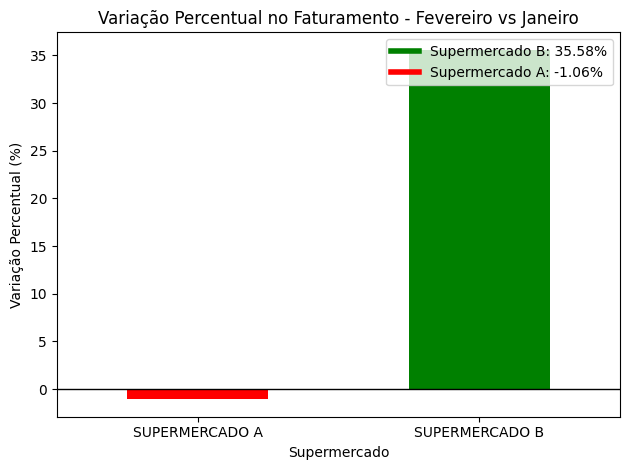

In [3]:
colors = ['green' if value > 0 else 'red' for value in crescimento_faturamento_por_rede]
fig, ax = plt.subplots()
bars = crescimento_faturamento_por_rede.plot(kind='bar', ax=ax, color=colors)

ax.set_title('Variação Percentual no Faturamento - Fevereiro vs Janeiro')
ax.set_ylabel('Variação Percentual (%)')
ax.set_xlabel('Supermercado')
ax.axhline(0, color='black', linewidth=1)

handles = [
    plt.Line2D([0], [0], color='green', lw=4, label=f'Supermercado B: {crescimento_faturamento_por_rede["SUPERMERCADO B"]:.2f}%'),
    plt.Line2D([0], [0], color='red', lw=4, label=f'Supermercado A: {crescimento_faturamento_por_rede["SUPERMERCADO A"]:.2f}%')
]
ax.legend(handles=handles, loc='upper right')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Crescimento total do grupo:

Houve um crescimento de 14,49% no faturamento bruto de janeiro para fevereiro.

Supermercado A teve uma retração de -1,06% no faturamento bruto.
Supermercado B teve um crescimento expressivo de 35,58% no faturamento bruto.

Portanto, o Supermercado B foi o responsável por puxar o resultado positivo do grupo em fevereiro, compensando a leve retração do Supermercado A.

2 – Quais categorias de produto puxam os resultados nas duas redes entre os meses de janeiro 
e fevereiro? 

In [4]:
faturamento_categoria_rede_mes = df_vendas_lojas.groupby(['MES', 'NOME_SUPERMERCADO', 'NOME_CATEGORIA'])['FATURAMENTO_BRUTO'].sum().unstack(level=0)
faturamento_categoria_variacao = ((faturamento_categoria_rede_mes['FEVEREIRO'] - faturamento_categoria_rede_mes['JANEIRO']) / faturamento_categoria_rede_mes['JANEIRO']) * 100

categoria_puxa_cima_a = faturamento_categoria_variacao.loc['SUPERMERCADO A'].idxmax()
categoria_puxa_baixo_a = faturamento_categoria_variacao.loc['SUPERMERCADO A'].idxmin()

categoria_puxa_cima_b = faturamento_categoria_variacao.loc['SUPERMERCADO B'].idxmax()
categoria_puxa_baixo_b = faturamento_categoria_variacao.loc['SUPERMERCADO B'].idxmin()

valor_cima_a = faturamento_categoria_variacao.loc['SUPERMERCADO A', categoria_puxa_cima_a]
valor_baixo_a = faturamento_categoria_variacao.loc['SUPERMERCADO A', categoria_puxa_baixo_a]

valor_cima_b = faturamento_categoria_variacao.loc['SUPERMERCADO B', categoria_puxa_cima_b]
valor_baixo_b = faturamento_categoria_variacao.loc['SUPERMERCADO B', categoria_puxa_baixo_b]

resultados = {
    "Supermercado A": {
        "Puxa para cima (categoria)": categoria_puxa_cima_a,
        "Variação para cima (%)": valor_cima_a,
        "Puxa para baixo (categoria)": categoria_puxa_baixo_a,
        "Variação para baixo (%)": valor_baixo_a
    },
    "Supermercado B": {
        "Puxa para cima (categoria)": categoria_puxa_cima_b,
        "Variação para cima (%)": valor_cima_b,
        "Puxa para baixo (categoria)": categoria_puxa_baixo_b,
        "Variação para baixo (%)": valor_baixo_b
    }
}

resultados


{'Supermercado A': {'Puxa para cima (categoria)': 'BEBIDAS',
  'Variação para cima (%)': np.float64(27.74220682987998),
  'Puxa para baixo (categoria)': 'LIMPEZA',
  'Variação para baixo (%)': np.float64(-19.43538175345064)},
 'Supermercado B': {'Puxa para cima (categoria)': 'BEBIDAS',
  'Variação para cima (%)': np.float64(59.79185256370656),
  'Puxa para baixo (categoria)': 'CESTA BASICA',
  'Variação para baixo (%)': np.float64(-6.721640949465321)}}

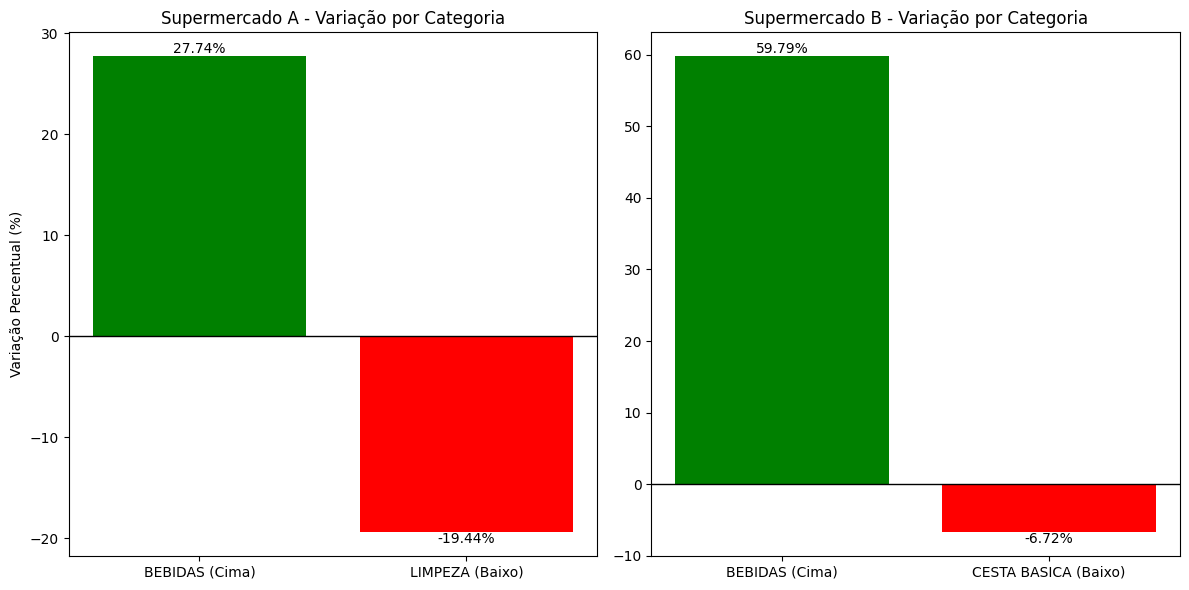

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

categorias_a = ['BEBIDAS (Cima)', 'LIMPEZA (Baixo)']
variacao_a = [valor_cima_a, valor_baixo_a]
colors_a = ['green', 'red']

bars_a = axs[0].bar(categorias_a, variacao_a, color=colors_a)
axs[0].set_title('Supermercado A - Variação por Categoria')
axs[0].set_ylabel('Variação Percentual (%)')
axs[0].axhline(0, color='black', linewidth=1)
for bar, valor in zip(bars_a, variacao_a):
    axs[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{valor:.2f}%', 
                ha='center', va='bottom' if valor > 0 else 'top')

categorias_b = ['BEBIDAS (Cima)', 'CESTA BASICA (Baixo)']
variacao_b = [valor_cima_b, valor_baixo_b]
colors_b = ['green', 'red']
bars_b = axs[1].bar(categorias_b, variacao_b, color=colors_b)
axs[1].set_title('Supermercado B - Variação por Categoria')
axs[1].axhline(0, color='black', linewidth=1)
for bar, valor in zip(bars_b, variacao_b):
    axs[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{valor:.2f}%', 
                ha='center', va='bottom' if valor > 0 else 'top')

plt.tight_layout()
plt.show()


Supermercado A:

Categoria que puxa para cima: BEBIDAS
Variação positiva de +27,74%
Categoria que puxa para baixo: LIMPEZA
Variação negativa de -19,44%


Supermercado B:

Categoria que puxa para cima: BEBIDAS
Variação positiva de +59,79%
Categoria que puxa para baixo: CESTA BASICA
Variação negativa de -6,72%


Para ambos, a categoria BEBIDAS impulsionou o crescimento entre janeiro e fevereiro, enquanto LIMPEZA puxou para baixo no Supermercado A e CESTA BASICA no Supermercado B.



3.0 Da mesma forma vista para categorias de produto, sob a perspectiva de clientes, quais 
foram os perfis mais determinantes para o resultado observado, por rede varejista?

In [6]:
file_perfil_clientes_path = 'tabela_perfil_clientes.xlsx'
df_perfil_clientes = pd.read_excel(file_perfil_clientes_path)
df_perfil_clientes.head()


,CODIGO_CLIENTE,PERFIL_SUPERMERCADO_A,PERFIL_SUPERMERCADO_B
0,2088692,ALTO POTENCIAL,FUTURO ABANDONADOR
1,8174500,PREMIUM,FUTURO ABANDONADOR
2,8496441,ALTO POTENCIAL,FUTURO ABANDONADOR
3,7498689,DESCOMPROMISSADO,FUTURO ABANDONADOR
4,41096357,FUTURO ABANDONADOR,BAIXO POTENCIAL


In [7]:
df_vendas_com_perfil = df_vendas.merge(df_perfil_clientes, on='CODIGO_CLIENTE', how='left')
faturamento_por_perfil_a = df_vendas_com_perfil.groupby('PERFIL_SUPERMERCADO_A')['FATURAMENTO_BRUTO'].sum()
faturamento_por_perfil_b = df_vendas_com_perfil.groupby('PERFIL_SUPERMERCADO_B')['FATURAMENTO_BRUTO'].sum()
faturamento_por_perfil_a_sorted = faturamento_por_perfil_a.sort_values(ascending=False)
faturamento_por_perfil_b_sorted = faturamento_por_perfil_b.sort_values(ascending=False)
faturamento_por_perfil_a_sorted, faturamento_por_perfil_b_sorted


(PERFIL_SUPERMERCADO_A
 FUTURO ABANDONADOR    3845921.88
 PREMIUM               2144815.29
 ALTO POTENCIAL        1362683.09
 BAIXO POTENCIAL       1265619.86
 DESCOMPROMISSADO       860959.96
 Name: FATURAMENTO_BRUTO, dtype: float64,
 PERFIL_SUPERMERCADO_B
 FUTURO ABANDONADOR    4016851.40
 PREMIUM               1859085.44
 ALTO POTENCIAL        1725145.13
 BAIXO POTENCIAL       1287208.15
 DESCOMPROMISSADO       591709.96
 Name: FATURAMENTO_BRUTO, dtype: float64)

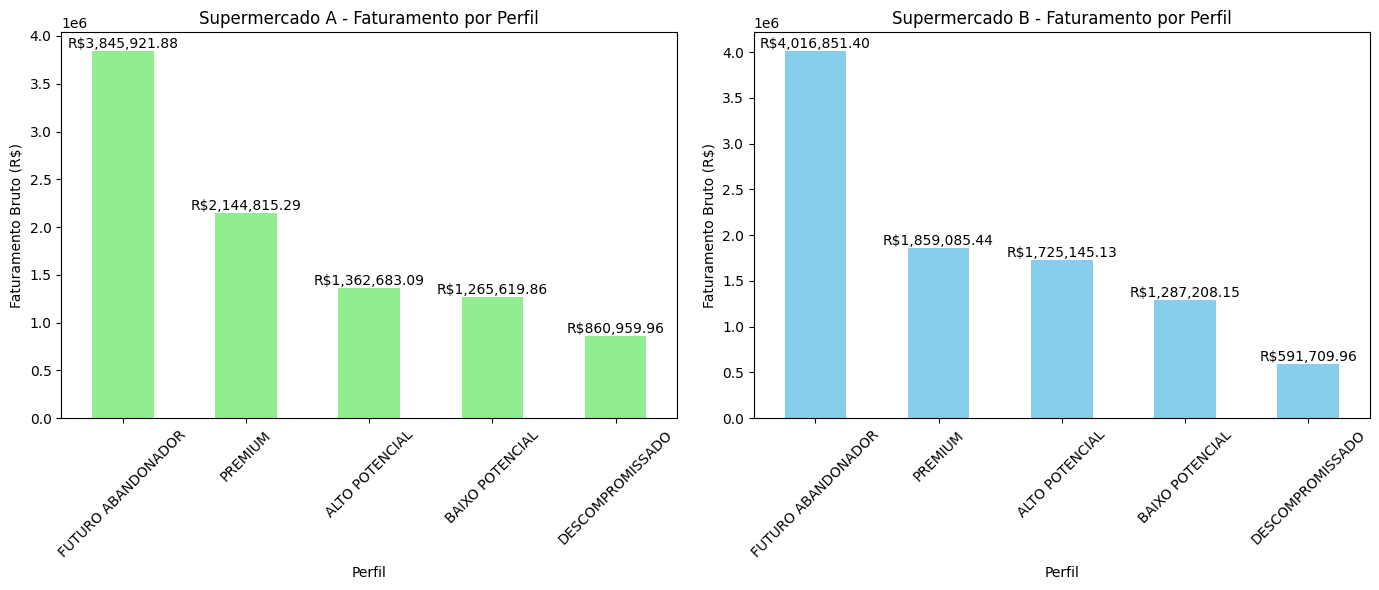

In [11]:

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
bars_a = faturamento_por_perfil_a_sorted.plot(kind='bar', ax=axs[0], color='lightgreen')
axs[0].set_title('Supermercado A - Faturamento por Perfil')
axs[0].set_ylabel('Faturamento Bruto (R$)')
axs[0].set_xlabel('Perfil')
axs[0].tick_params(axis='x', rotation=45)
for bar in bars_a.patches:
    axs[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'R${bar.get_height():,.2f}', 
                ha='center', va='bottom')

bars_b = faturamento_por_perfil_b_sorted.plot(kind='bar', ax=axs[1], color='skyblue')
axs[1].set_title('Supermercado B - Faturamento por Perfil')
axs[1].set_ylabel('Faturamento Bruto (R$)')
axs[1].set_xlabel('Perfil')
axs[1].tick_params(axis='x', rotation=45)
for bar in bars_b.patches:
    axs[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'R${bar.get_height():,.2f}', 
                ha='center', va='bottom')
plt.tight_layout()
plt.show()


Supermercado A:
FUTURO ABANDONADOR: R$ 3.845.921,88
PREMIUM: R$ 2.144.815,29
ALTO POTENCIAL: R$ 1.362.683,09
BAIXO POTENCIAL: R$ 1.265.619,86
DESCOMPROMISSADO: R$ 860.959,96

Supermercado B:
FUTURO ABANDONADOR: R$ 4.016.851,40
PREMIUM: R$ 1.859.085,44
ALTO POTENCIAL: R$ 1.725.145,13
BAIXO POTENCIAL: R$ 1.287.208,15
DESCOMPROMISSADO: R$ 591.709,96

Conclusão:
O perfil FUTURO ABANDONADOR foi o mais determinante em termos de faturamento para ambos os supermercados.
Outros perfis, como PREMIUM e ALTO POTENCIAL, também tiveram contribuições significativas, mas em menor escala.

3.1 -  Existem grandes diferenças aparentes entre as estratégias das duas redes entre categorias e clientes? 

Supermercado A:
A categoria BEBIDAS teve um crescimento significativo de +27,74%, enquanto LIMPEZA apresentou uma retração de -19,44%.
Isso sugere uma forte demanda em BEBIDAS, mas possível dificuldade com a categoria LIMPEZA.

O perfil FUTURO ABANDONADOR liderou o faturamento (R$ 3.845.921,88), seguido pelo perfil PREMIUM (R$ 2.144.815,29).
Isso pode sugerir que, no Supermercado A, há uma grande dependência de clientes que estão classificados como FUTURO ABANDONADOR, o que pode indicar uma falta de fidelização ou uma perda iminente de clientes.

Supermercado B:
A categoria BEBIDAS cresceu ainda mais, com um aumento de +59,79%, enquanto CESTA BASICA apresentou uma leve queda de -6,72%.
Novamente, BEBIDAS foi a categoria de destaque, sugerindo que o foco em bebidas é consistente, mas a performance em CESTA BASICA foi menos positiva.

O perfil FUTURO ABANDONADOR também lidera (R$ 4.016.851,40), mas o perfil PREMIUM e ALTO POTENCIAL também têm contribuições significativas.
Isso pode indicar que o Supermercado B também enfrenta desafios com a fidelização de clientes, mas parece ter um equilíbrio melhor entre os perfis, com maiores contribuições dos clientes PREMIUM e ALTO POTENCIAL.

Conclusão:
Ambas as redes têm BEBIDAS como principal motor de crescimento, sugerindo uma estratégia comum. No entanto, o Supermercado A tem problemas mais evidentes com a categoria LIMPEZA, enquanto o Supermercado B apresenta uma leve queda em CESTA BASICA.

A dependência de clientes classificados como FUTURO ABANDONADOR é notável em ambas as redes, mas o Supermercado A parece ser mais vulnerável. O Supermercado B tem um mix mais equilibrado de clientes com PREMIUM e ALTO POTENCIAL desempenhando papéis maiores.
As estratégias de ambos os supermercados podem estar focadas em atrair e manter clientes de BEBIDAS, mas ambos enfrentam desafios significativos com a retenção de clientes.

4 - O movimento visto para as duas redes, do ponto de vista de clientes, é puxado por 
maior/menor fluxo de consumidores em loja, ou por alterações em seus padrões de gasto 
entre os meses de janeiro e fevereiro? 

In [9]:
fluxo_consumidores_a = df_vendas_lojas[df_vendas_lojas['NOME_SUPERMERCADO'] == 'SUPERMERCADO A'].groupby('MES')['CODIGO_CUPOM_FISCAL'].nunique()
fluxo_consumidores_b = df_vendas_lojas[df_vendas_lojas['NOME_SUPERMERCADO'] == 'SUPERMERCADO B'].groupby('MES')['CODIGO_CUPOM_FISCAL'].nunique()
ticket_medio_a = df_vendas_lojas[df_vendas_lojas['NOME_SUPERMERCADO'] == 'SUPERMERCADO A'].groupby('MES')['FATURAMENTO_BRUTO'].sum() / fluxo_consumidores_a
ticket_medio_b = df_vendas_lojas[df_vendas_lojas['NOME_SUPERMERCADO'] == 'SUPERMERCADO B'].groupby('MES')['FATURAMENTO_BRUTO'].sum() / fluxo_consumidores_b

{
    'Fluxo de Consumidores - Supermercado A': fluxo_consumidores_a,
    'Ticket Médio - Supermercado A': ticket_medio_a,
    'Fluxo de Consumidores - Supermercado B': fluxo_consumidores_b,
    'Ticket Médio - Supermercado B': ticket_medio_b
}


{'Fluxo de Consumidores - Supermercado A': MES
 FEVEREIRO    42095
 JANEIRO      45141
 Name: CODIGO_CUPOM_FISCAL, dtype: int64,
 'Ticket Médio - Supermercado A': MES
 FEVEREIRO    59.787526
 JANEIRO      56.349711
 dtype: float64,
 'Fluxo de Consumidores - Supermercado B': MES
 FEVEREIRO    21021
 JANEIRO      21287
 Name: CODIGO_CUPOM_FISCAL, dtype: int64,
 'Ticket Médio - Supermercado B': MES
 FEVEREIRO    120.999260
 JANEIRO       88.130615
 dtype: float64}

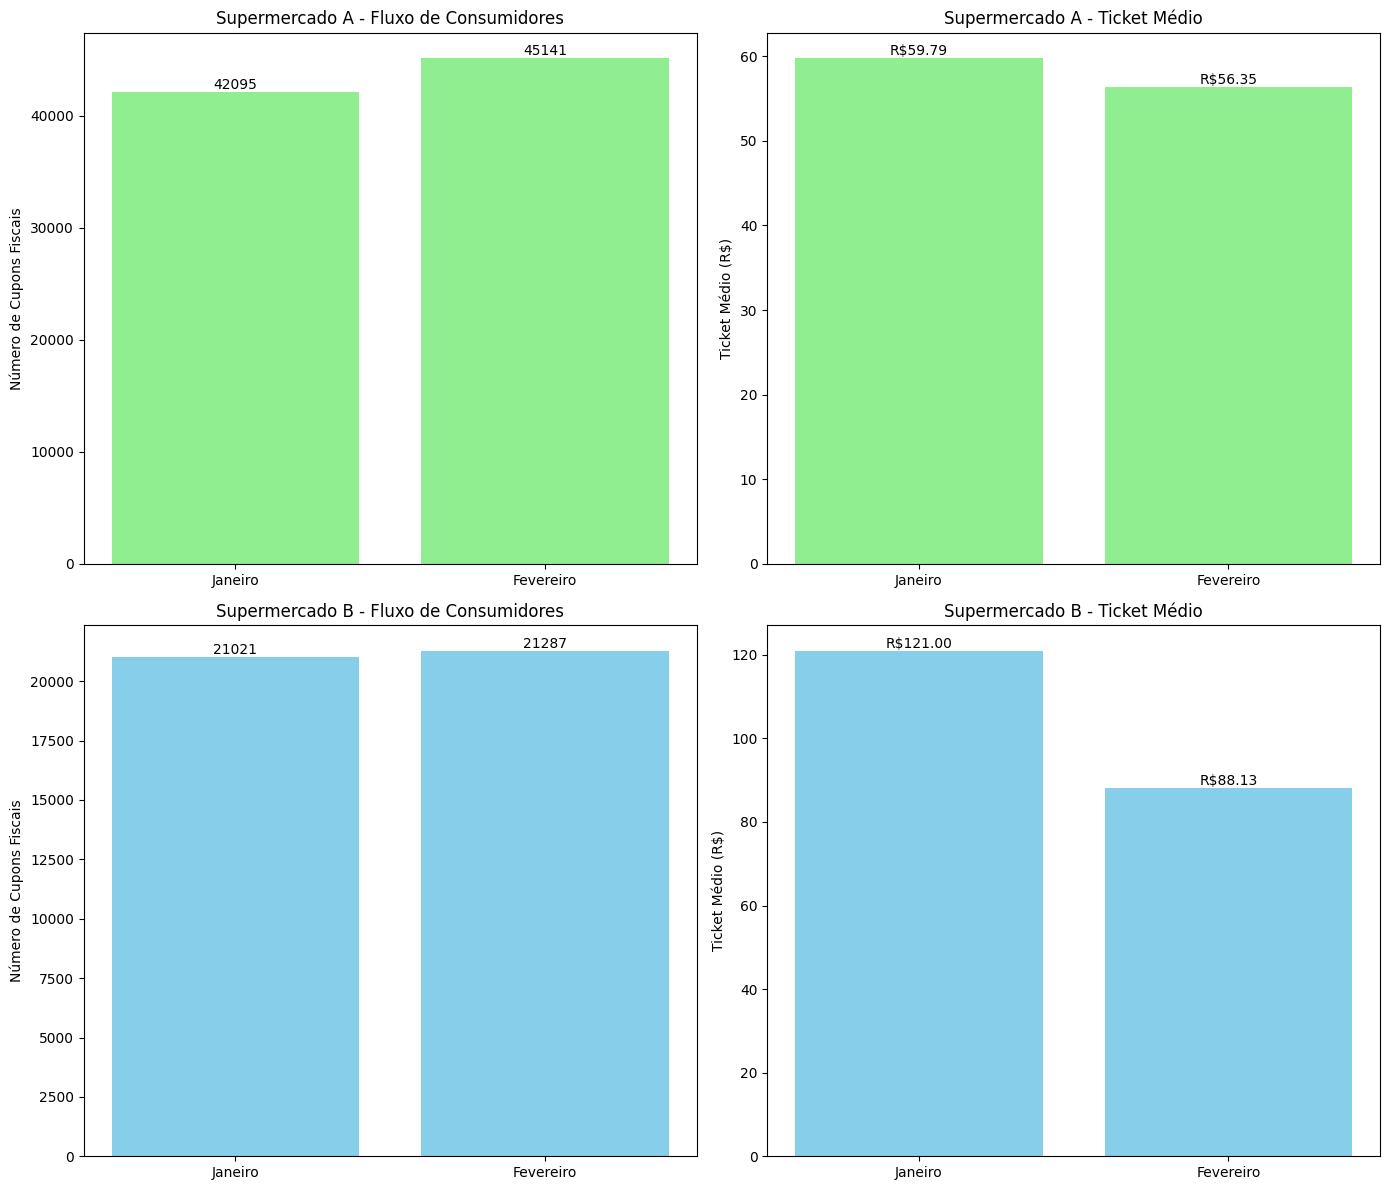

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(14, 12))
axs[0, 0].bar(['Janeiro', 'Fevereiro'], fluxo_consumidores_a, color='lightgreen')
axs[0, 0].set_title('Supermercado A - Fluxo de Consumidores')
axs[0, 0].set_ylabel('Número de Cupons Fiscais')
for i, valor in enumerate(fluxo_consumidores_a):
    axs[0, 0].text(i, valor, f'{valor}', ha='center', va='bottom')

axs[0, 1].bar(['Janeiro', 'Fevereiro'], ticket_medio_a, color='lightgreen')
axs[0, 1].set_title('Supermercado A - Ticket Médio')
axs[0, 1].set_ylabel('Ticket Médio (R$)')
for i, valor in enumerate(ticket_medio_a):
    axs[0, 1].text(i, valor, f'R${valor:.2f}', ha='center', va='bottom')

axs[1, 0].bar(['Janeiro', 'Fevereiro'], fluxo_consumidores_b, color='skyblue')
axs[1, 0].set_title('Supermercado B - Fluxo de Consumidores')
axs[1, 0].set_ylabel('Número de Cupons Fiscais')
for i, valor in enumerate(fluxo_consumidores_b):
    axs[1, 0].text(i, valor, f'{valor}', ha='center', va='bottom')

axs[1, 1].bar(['Janeiro', 'Fevereiro'], ticket_medio_b, color='skyblue')
axs[1, 1].set_title('Supermercado B - Ticket Médio')
axs[1, 1].set_ylabel('Ticket Médio (R$)')
for i, valor in enumerate(ticket_medio_b):
    axs[1, 1].text(i, valor, f'R${valor:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Supermercado A:
Fluxo de Consumidores (Número de Cupons Fiscais):
Janeiro: 45.141 cupons fiscais
Fevereiro: 42.095 cupons fiscais (queda no fluxo de consumidores)
Ticket Médio (Valor Médio Gasto por Cupom Fiscal):
Janeiro: R$ 56,35
Fevereiro: R$ 59,79 (aumento no ticket médio)

Supermercado B:
Fluxo de Consumidores (Número de Cupons Fiscais):
Janeiro: 21.287 cupons fiscais
Fevereiro: 21.021 cupons fiscais (leve queda no fluxo de consumidores)
Ticket Médio (Valor Médio Gasto por Cupom Fiscal):
Janeiro: R$ 88,13
Fevereiro: R$ 121,00 (aumento significativo no ticket médio)

Conclusão:
Supermercado A: O movimento observado em fevereiro foi puxado mais por um aumento no ticket médio (maior gasto por cliente), apesar de uma leve queda no fluxo de consumidores.

Supermercado B: O crescimento observado em fevereiro foi fortemente puxado por um aumento no ticket médio, enquanto o fluxo de consumidores praticamente se manteve estável.

E em ambas as redes, o aumento no padrão de gasto dos clientes (ticket médio) foi o fator determinante para os resultados de fevereiro, mais do que o fluxo de consumidores em loja.

5 – Com o diagnóstico obtido até aqui, quais recomendações você forneceria aos times de 
marketing, operações e comercial das redes? 

1. Recomendações para o Time de Marketing:

Supermercado A:

Focar na Fidelização: O perfil FUTURO ABANDONADOR representa uma grande parte das receitas, o que indica um risco de perda de clientes importantes. O time de marketing deve implementar campanhas de fidelização para reter esses clientes, como programas de recompensas, descontos personalizados e comunicação direcionada
especialmente para categoria LIMPEZA que apresentou uma retração significativa. Ainda é possivel fortalecer o setor com analises que considerem periodos dentro do mês, produtos do setor mais vendidos e dados geograficos para fortalecer as vendas com promoções direcionadas.

Supermercado B:

Aproveitar o Crescimento no Ticket Médio: O ticket médio aumentou significativamente, sugerindo que os clientes estão dispostos a gastar mais por compra. O marketing deve capitalizar isso promovendo produtos de ticket mais alto, principalmente no setor de BEBIDAS. Também cabe atenção a dados temporais e geograficos, para focar campanhas em festividades regionais e nacionais para promover as vendas.


2. Recomendações para o Time de Operações:

Supermercado A:

Otimização do Estoque de Limpeza: Dado o declínio nas vendas de produtos de limpeza, pode ser necessário rever a alocação de espaço no estoque e no piso de vendas. É possível que esses produtos estejam sendo mal posicionados ou não estejam disponíveis em quantidades adequadas.
Focar na Experiência do Cliente: Como o fluxo de clientes caiu podemos tentar melhorar a experiencia investindo em treinamentos da equipe, manutenção e limpeza do estabelecimento, mas caso seja dificil identificar ou tenhamos um caixa limitado para esse investimento o melhor seria aplicar pesquisas no caixa, corredores ou no pós compra afim de obter o primeiro direcionamento. 

Supermercado B:

Gerenciamento de Estoque para Bebidas: Com a categoria sendo tão forte, o time de operações precisa garantir que não haja rupturas de estoque e que os produtos estejam sempre bem abastecidos.
Aprimoramento da Experiência em Loja: Com o crescimento no ticket médio, o foco está em melhorar a organização da loja, criando uma experiencia mais fluida como um roteiro que beneficie principalmente os produtos com ticket maior.

3. Recomendações para o Time Comercial:

Supermercado A:

Contratos do setor Limpeza: É importante rever acordos comerciais com fornecedores da categoria. Podem ser necessários novos contratos que ofereçam melhores condições, margens mais competitivas ou promoções mais atraentes para reverter a retração nessa categoria. Uma analise mais especifica por produto pode ajudar na argumentação.

Supermercado B:

Rever Ofertas da Cesta Básica: A retração nessa categoria sugere que os preços podem estar desalinhados com a expectativa do consumidor. Negociações com fornecedores para ajustar os preços ou desenvolver promoções mais atraentes são essenciais.

6 – Quais insights você pode trazer sobre o que o time de marketing poderia fazer para 
alavancar as vendas? 

1. Fidelização de Clientes (Especialmente para o Perfil "Futuro Abandonador")
Insight: O perfil Futuro Abandonador está gerando uma grande parte do faturamento em ambas as redes, mas é um grupo de clientes em risco de abandono.
O marketing deve lançar campanhas de fidelização personalizadas/cumulativas para esses clientes e inseri-los em uma régua de comunicação especial sobre promoções basedas no histórico de compras.

2. Promoções Sazonais e de Produtos Chave (Foco em Bebidas)
Insight: A categoria de Bebidas está claramente puxando o crescimento em ambas as redes. Há uma oportunidade de continuar explorando essa tendência.
Ação de Marketing: Criar promoções sazonais focadas em feriados, eventos esportivos, festas de fim de ano, ou momentos onde o consumo de bebidas aumenta.

3. Upselling e Cross-Selling com Base no Ticket Médio
Insight: O ticket médio aumentou, indicando que os clientes estão dispostos a gastar mais por compra. Isso sugere que há espaço para upselling (vender produtos de maior valor) e cross-selling (venda de produtos complementares).
Ação de Marketing: Implementar campanhas que sugiram produtos complementares ou de maior valor no ponto de venda e nas plataformas digitais. Oferecer pacotes que combinem diferentes categorias de produtos.

4. Recuperação de Categorias em Declínio (Limpeza e Cesta Básica)
Insight: Algumas categorias, como Limpeza no Supermercado A e Cesta Básica no Supermercado B, estão em declínio. Esses produtos são essenciais e, se recuperados, podem estabilizar o desempenho.
Ação de Marketing: Promover campanhas de preços competitivos e ofertas especiais nessas categorias. Implementar campanhas promocionais que destaquem os benefícios e a qualidade dos produtos dessas categorias.

5. Campanhas Geolocalizadas para Diferentes Lojas
Insight: Se houver dados geográficos disponíveis, o marketing pode explorar o desempenho por região.
Ação de Marketing: Realizar campanhas geolocalizadas focadas em lojas que tiveram baixo desempenho, incentivando os consumidores dessas regiões a visitarem a loja com promoções regionais.